In [56]:
import yfinance as yf

tesla = yf.Ticker('TSLA')
tesla_data = tesla_stock.history(period='max')
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [125]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

In [126]:
soup=BeautifulSoup(html_data, 'html.parser')

In [127]:
quarterly_table=soup.find_all('tbody')[1]


In [128]:
import pandas as pd

rows = []
for row in quarterly_table.find_all('tr'):
    col = row.find_all("td")
    if col:  # Check if 'col' is not empty
        date = col[0].text.strip()
        revenue = col[1].text.strip()
        rows.append({'Date': date, 'Revenue': revenue})

# Create the DataFrame from the list of rows
tesla_revenue = pd.DataFrame(rows, columns=['Date', 'Revenue'])

In [132]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

In [133]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [134]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [90]:
game = yf.Ticker('GME')
game_data = gamestop_stock.history(period='max')
game_data.reset_index(inplace=True)
game_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [140]:
url2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
response = requests.get(url2).text
soup2 = BeautifulSoup(response, 'html.parser')

In [141]:
gme_table = soup2.find_all('tbody')[1]

In [142]:
import pandas as pd

rows = []
for row in gme_table.find_all('tr'):
    col = row.find_all("td")
    if col:  # Check if 'col' is not empty
        date = col[0].text.strip()
        revenue = col[1].text.strip()
        rows.append({'Date': date, 'Revenue': revenue})

# Create the DataFrame from the list of rows
gme_revenue = pd.DataFrame(rows, columns=['Date', 'Revenue'])

In [143]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)

In [144]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [145]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [149]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=tesla_data['Date'], y=tesla_data['Close'], name="Tesla Stock Price"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=tesla_revenue['Date'], y=tesla_revenue['Revenue'], name="Tesla Revenue"),
    secondary_y=True,
)

fig.update_layout(
    title_text="Tesla Stock Price and Revenue"
)

fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Stock Price", secondary_y=False)
fig.update_yaxes(title_text="Revenue", secondary_y=True)

fig.show()


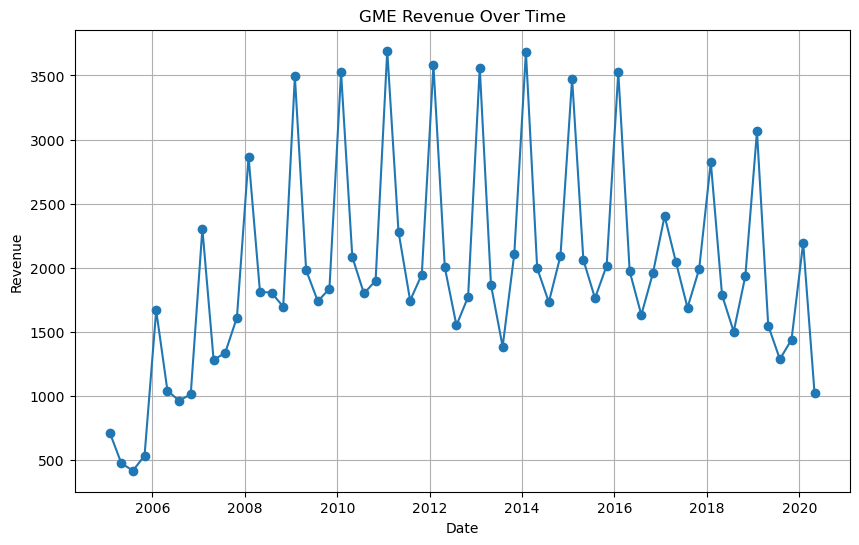

In [152]:
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(table, title):
    rows = []

    # Iterate over each row in the table
    for row in table.find_all('tr'):
        col = row.find_all("td")
        if col:  # Check if 'col' is not empty
            date = col[0].text.strip()
            revenue = col[1].text.strip()
            rows.append({'Date': date, 'Revenue': revenue})

    # Create the DataFrame from the list of rows
    revenue_df = pd.DataFrame(rows, columns=['Date', 'Revenue'])

    # Clean the 'Revenue' column
    revenue_df["Revenue"] = revenue_df['Revenue'].str.replace(',|\$',"", regex=True)

    # Convert 'Revenue' to a numeric type
    revenue_df['Revenue'] = pd.to_numeric(revenue_df['Revenue'], errors='coerce')

    # Convert 'Date' to datetime type for plotting
    revenue_df['Date'] = pd.to_datetime(revenue_df['Date'])

    # Sort the DataFrame by date
    revenue_df = revenue_df.sort_values('Date')

    # Plotting the graph
    plt.figure(figsize=(10, 6))
    plt.plot(revenue_df['Date'], revenue_df['Revenue'], marker='o', linestyle='-')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.grid(True)
    plt.show()

# Assuming you have a BeautifulSoup object named `gme_table`
make_graph(gme_table, 'GME Revenue Over Time')


In [13]:
import yfinance as yf

tesla_stock = yf.Ticker('TSLA')
tesla_stock_data = tesla_stock.history(period='max')
tesla_stock_data.reset_index(inplace=True)
tesla_stock_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
